In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df= pd.read_csv('Titanic Train.csv',usecols= ['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
# there are some missing values in age column
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True) #missing value is fill by mean of age

In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
X= df.iloc[:,1:3]
y= df.iloc[:,0]

In [12]:
# now we first do train test split
X_train,X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\rahul\AppData\Local\Temp\ipykernel_18220\2511059326.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


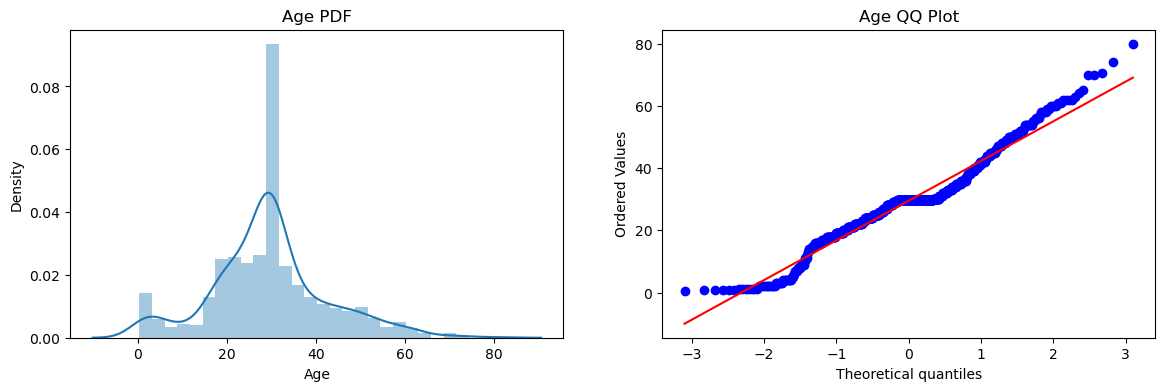

In [16]:
# now we check that our column is normally distributed or not 
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()
          

In [14]:
## above 2 plot show that age data is close to normal distribution

C:\Users\rahul\AppData\Local\Temp\ipykernel_18220\3480765152.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


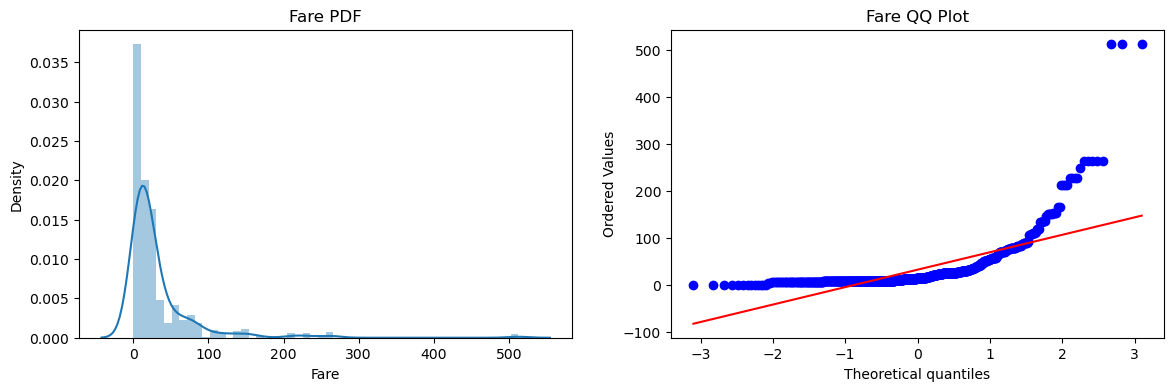

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

plt.show()
          

In [18]:
## this is right skewed

In [19]:
## for  right skeweed we apply log transformation

In [20]:
## now we calculate the accuracy for both the model


In [24]:
clf= LogisticRegression()
clf2= DecisionTreeClassifier()

In [25]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred= clf.predict(X_test)
y_pred1= clf2.predict(X_test)

print('Accuracy LR', accuracy_score(y_test,y_pred))
print('Accuracy DT', accuracy_score(y_test,y_pred1))


Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [26]:
## now we apply the log transformation and check what happen to accuraccy

In [35]:
trf = FunctionTransformer(func=np.log1p)

In [40]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [44]:
clf= LogisticRegression()
clf2= DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred= clf.predict(X_test_transformed)
y_pred1= clf2.predict(X_test_transformed)

print('Accuracy LR', accuracy_score(y_test,y_pred))
print('Accuracy DT', accuracy_score(y_test,y_pred1))


Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [46]:
## we apply log transformation on fair column only to increase its accuracy more as age data is normally distributed 
## DT  is not affected by transformation it showing the same accuracy but LT is affected

# Reciprocal Transformation

In [67]:
def apply_transform(transform):
    X= df.iloc[:,1:3]
    y= df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder= 'passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print('Accuracy',np.mean(cross_val_score(clf,X_trans,y,scoring= 'accuracy', cv=10)))
    
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    stats.probplot(X['Fare'],dist='norm', plot= plt)
    plt.title('Fare Before Transform')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.show()
    
   

Accuracy 0.6442446941323345


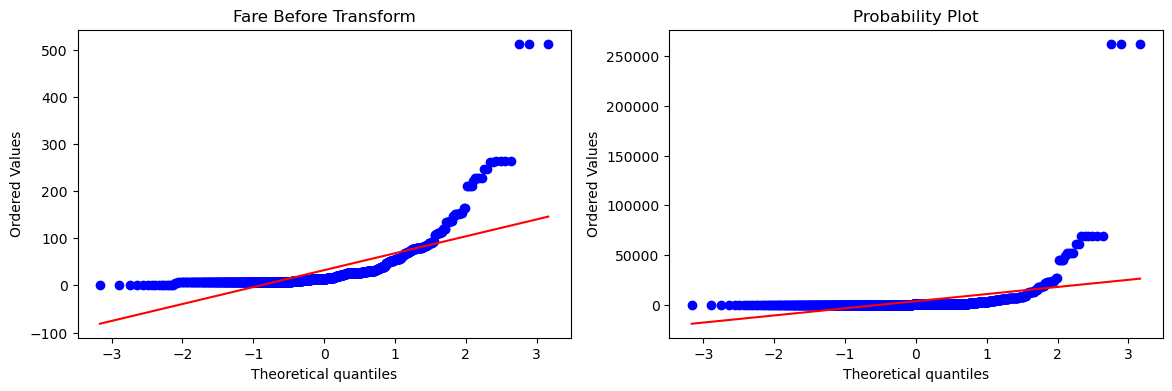

In [68]:
apply_transform(lambda x: x**2) # square

Accuracy 0.61729088639201


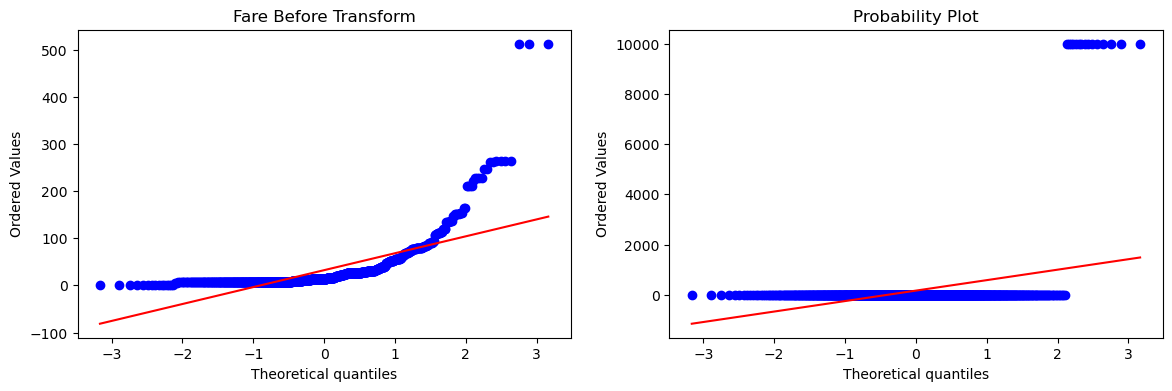

In [71]:
apply_transform(lambda x: 1/(x+0.0001)) #reciprocal

Accuracy 0.6589013732833957


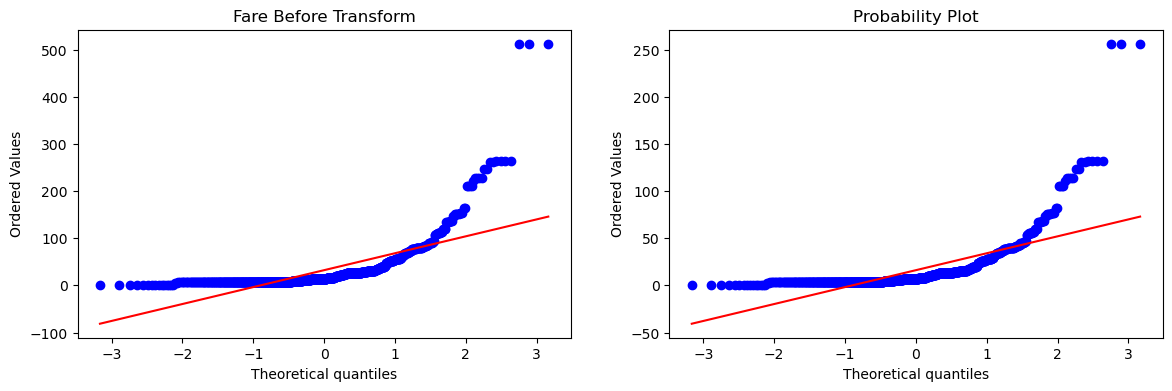

In [72]:
apply_transform(lambda x: x**1/2)   #sqrt